In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first='True')

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [16]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [17]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [20]:
X_train_scaler

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense




In [24]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [74]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=11))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                384       
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [78]:
history = model.fit(X_train_scaler,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


200/200 [==============================] - 2s 4ms/step - loss: 0.5384 - accuracy: 0.7375 - val_loss: 0.4455 - val_accuracy: 0.8112
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8195 - val_loss: 0.4091 - val_accuracy: 0.8250
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8434 - val_loss: 0.3784 - val_accuracy: 0.8381
Epoch 4/100
200/200 [==============================] - 1s 2ms/step - loss: 0.3681 - accuracy: 0.8545 - val_loss: 0.3632 - val_accuracy: 0.8438
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8566 - val_loss: 0.3543 - val_accuracy: 0.8525
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8581 - val_loss: 0.3540 - val_accuracy: 0.8481
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3472 - accuracy: 0.8584 - val_loss: 0.3508 - val_accuracy: 0.8537
Epoch 8/100

In [79]:
y_log = model.predict(X_test_scaler)

63/63 [==============================] - 0s 1ms/step


In [80]:
y_pred = np.where(y_log > 0.5, 1.0,0.0)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8565

In [82]:
import matplotlib.pyplot as plt

In [83]:
history.history

{'loss': [0.5384250283241272,
  0.42492911219596863,
  0.3904595971107483,
  0.3681071400642395,
  0.3567276895046234,
  0.3503150939941406,
  0.34722718596458435,
  0.34356632828712463,
  0.34092381596565247,
  0.3391365706920624,
  0.33770066499710083,
  0.33392879366874695,
  0.3329894244670868,
  0.33151569962501526,
  0.33081066608428955,
  0.3298545777797699,
  0.3278876543045044,
  0.3268428444862366,
  0.3256365656852722,
  0.32553383708000183,
  0.32403114438056946,
  0.3237757384777069,
  0.32338473200798035,
  0.3218318223953247,
  0.32117488980293274,
  0.32066676020622253,
  0.31926777958869934,
  0.31835344433784485,
  0.3181416094303131,
  0.3162531554698944,
  0.31612980365753174,
  0.31563836336135864,
  0.3144298493862152,
  0.31461986899375916,
  0.3137945830821991,
  0.31236833333969116,
  0.3123033046722412,
  0.3105594515800476,
  0.3105039894580841,
  0.31003743410110474,
  0.30913275480270386,
  0.3081788718700409,
  0.3080260157585144,
  0.30676212906837463,
  

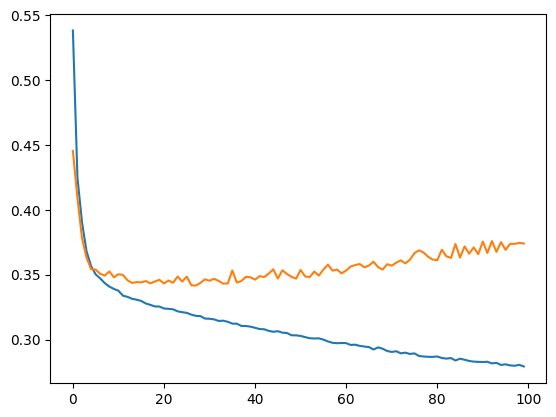

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

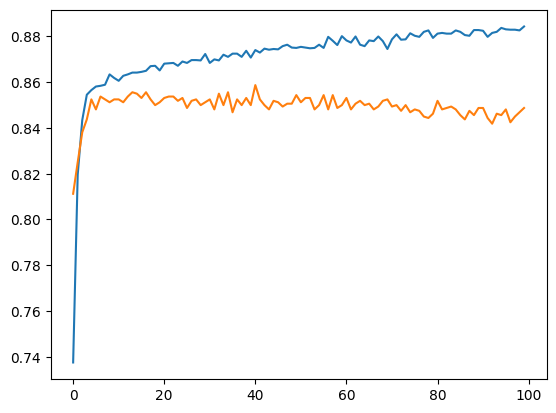

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])